In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
import matplotlib.image as mpimg

from skimage.segmentation import watershed
from skimage.feature import peak_local_max

In [6]:
blur0 = !ls cropfigs/*wg04big*_blur0.tif

In [7]:
# stack = np.zeros((166,166))
images = []
for b in blur0:
    img = mpimg.imread(b)
    images.append(img)

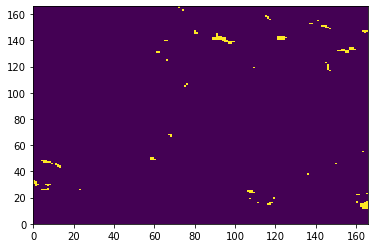

In [9]:
plt.pcolormesh(images[0])

In [26]:
img = mpimg.imread('cropfigs/wg04sm_0009_blur2.tif')


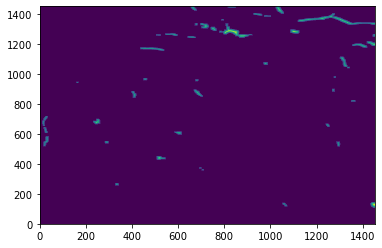

In [27]:
# distance = ndi.distance_transform_edt(images[0])
distance = ndi.distance_transform_edt(img)
plt.pcolormesh(distance)

In [29]:
# local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=images[0])
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=img)
markers = ndi.label(local_maxi)[0]
# labels = watershed(-distance, markers, mask=images[0])
labels = watershed(-distance, markers, mask=img)

In [34]:
markers

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

Text(0.5, 1.0, 'Separated objects')

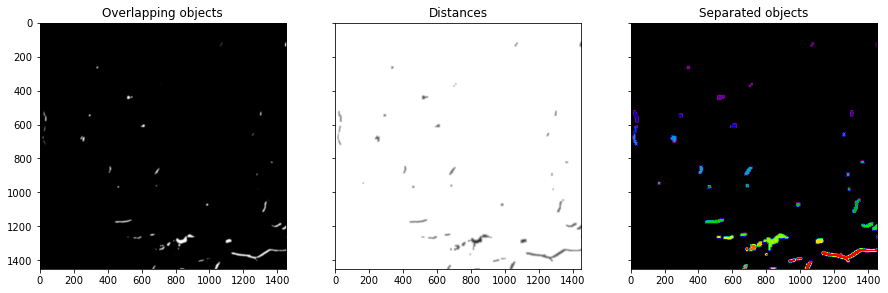

In [30]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 6), sharex=True, sharey=True)
ax = axes.ravel()

# ax[0].imshow(images[0], cmap=plt.cm.gray)
ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray)
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated objects')


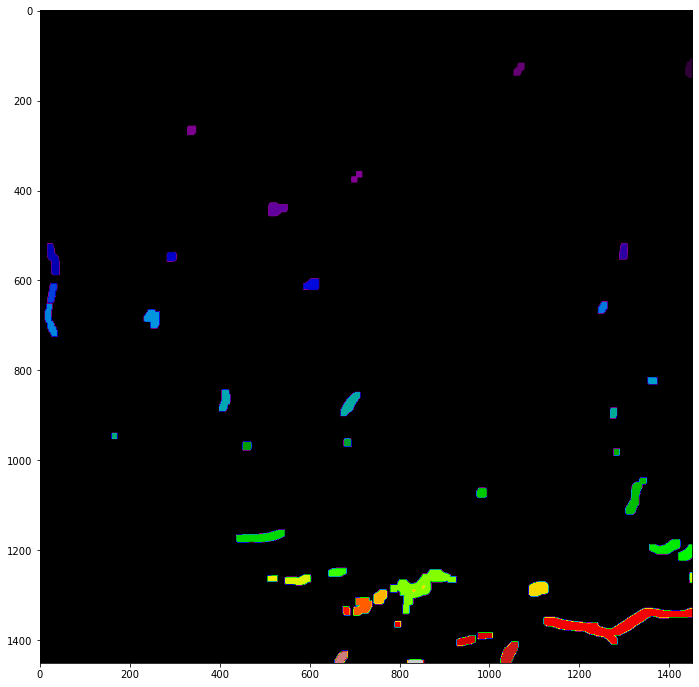

In [31]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(labels, cmap=plt.cm.nipy_spectral)

Text(0.5, 1.0, 'Separated objects')

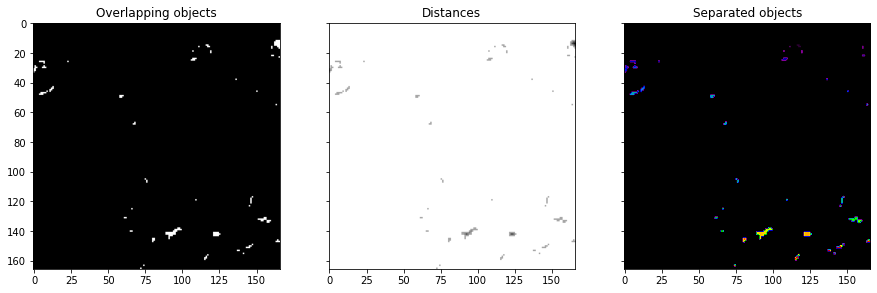

In [32]:
distance = ndi.distance_transform_edt(images[0])
# distance = ndi.distance_transform_edt(img)

local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=images[0])
# local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=img)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=images[0])
# labels = watershed(-distance, markers, mask=img)

fig, axes = plt.subplots(ncols=3, figsize=(15, 6), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(images[0], cmap=plt.cm.gray)
# ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray)
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated objects')


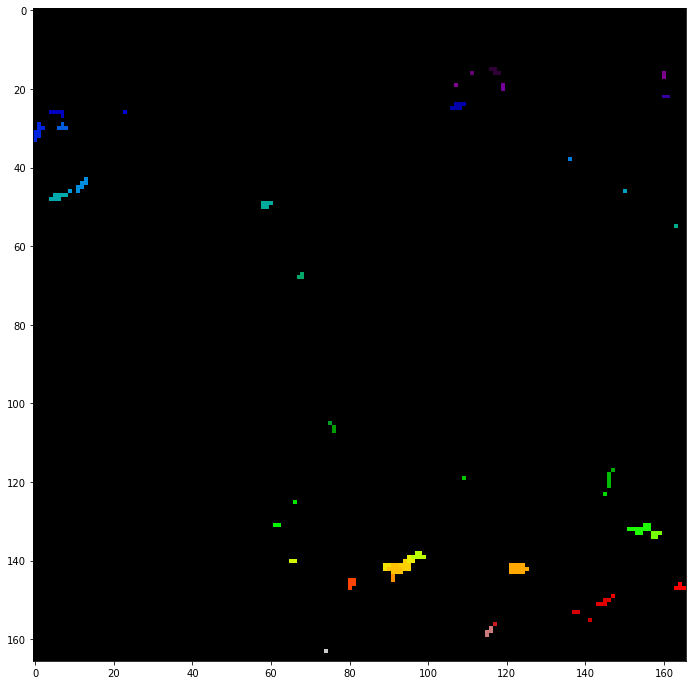

In [33]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(labels, cmap=plt.cm.nipy_spectral)